# Best Locations to Site Shopping Malls in Lagos & Venues Data Analysis of Lagos Neighbourhoods

### Applied Data Science Capstone by IBM/Coursera





## Introduction

This blog post is part of the final capstone project for Coursera’s IBM Data Science Professional Certification. Through this article, I will be sharing the methods and techniques to solve a business problem with the help of data science.

We will begin with the following steps, necessary for any Data Science project:

- [Business Problem](#business)
- [Data Collection](#data)
- [Methodology](#methodology)
- [Results & Discussion](#result)
- [Conclusion](#conclusion)

## 1.0 Business Problem <a name="business"></a>

Lagos is the most populous city in Nigeria and the African continent. Being an economic hub and major financial centre for all of Africa, Lagos has the fourth-highest GDP in Africa. Over 50% of Nigeria's industrial capacity is located in Lagos, with a variety of manufactured goods being produced in the city, including electronic equipment, machinery, foodstuffs, beverages, and chemicals.

The retail sector in Nigeria is based on the latent potential of Nigeria’s population, consequently, placing Lagos as the hub of Nigeria's retail market. Therefore, firms hoping to cater to that block of consumers in Lagos should explore innovative ways to reduce market friction and improve the shopping experience for the buyers.

Shopping malls can provide the best shopping experience and reduce the pressure on traditional markets which mostly lead to congestion of roads and public spaces. Moreso, shopping malls can enable social gatherings, entertainment, performances, product launches, promotions, and festivals. 

By knowing which location is less condensed with shopping malls, investors and firms can easily make data-driven decisions when expanding their businesses within the state. 

In this project, I tried to;

 - **Find an optimal location for a Shopping Mall in Lagos. Since there are a number  of Shopping Malls in Lagos, I tried to detect locations that are already crowded with Shopping malls, then spot locations that are less condensed with Shopping malls.**
 - **Explore business opportunities across Lagos Neighbourhoods by identifying top venues in Lagos and the business activities within.**
 
This project is particularly useful to property developers and investors looking to open or invest in new shopping malls in the financial capital of Lagos, Nigeria. This project is also viable as it has the potential to help the traffic congestion in the city.




## 2.0 Data Collection <a name="data"></a>

To solve the problem, we will require the below-mentioned data:

1. A list of LGA and neighborhoods in Lagos via Wikipedia defines the scope of this project which is confined to the city of Lagos.
2. The coordinate of Lagos state to be obtained using Google Maps API reverse geocoding
3. Python Geocoder package/Google map for latitude and longitude coordinates of the neighborhoods in order to plot the map and also to get the venue data.
4. Foursquare API to get the venue data for the neighborhoods.
5. Python Folium Package for Map Visualisation.
6. Matplotlib for graphical visualization

Moreso, I used the k-means clustering algorithm to create emerging clusters for the neighborhoods with top venues.

## 3.0 Methodology <a name="methodology"></a>

### Import necessary Libraries

In [10]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

! pip install folium

! pip install lxml

! pip install html5lib

! pip install BeautifulSoup4

! pip install matplotlib

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
! pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import matplotlib as mpl
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


### Import Lagos state data of LGA with their Neighbourhoods and Cordinates 

To do this, Centers of popular wards within each LGA was manually collated on excel and imported into pandas. These wards have been renamed as neighbourhood.

In [138]:
# Centers of popular wards within each LGA was manually collated on excel and imported into pandas.

lagos_data = pd.read_csv(r'C:\Users\hp\Desktop\David Ezekiel\Cousera Course\Data Science Capstone\Project Data 5.csv')
lagos_data.head()

,LGA,Neighbourhood,Latitude,Longitude
0,Agege,Isale/Idimangoro,6.611174,3.322951
1,Agege,Oniwaya,6.618026,3.320924
2,Agege,Agbotikuyo,6.618338,3.310019
3,Agege,Oyewole,6.620841,3.306352
4,Agege,Okekoto,6.627380,3.318414


In [139]:
# print the number of rows of the dataframe.

lagos_data.shape

(196, 4)

## 3.1 Explore the neighborhoods in Lagos

### Use geopy library to get the latitude and longitude values of Lagos

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent ny_explorer, as shown below:

In [140]:
address = 'Lagos'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Lagos are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Lagos are 6.4550575, 3.3941795.


### Create map of Lagos using latitude and longitude values with LGAs superimposed on top

In [141]:
map_newtor = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, LGA, Neighbourhood in zip(lagos_data['Latitude'], lagos_data['Longitude'], lagos_data['LGA'], lagos_data['Neighbourhood']):
    label = '{}, {}'.format(Neighbourhood, LGA)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newtor)  
    
map_newtor

### Define Foursquare Credentials and Version

In [142]:
CLIENT_ID = 'RYG0FEGEH3QBFNQLEAUQ4ITQ1HH33DXGPH2YAUE3CJMKSCLJ' # my Foursquare ID
CLIENT_SECRET = 'R5D0JKT5IH3DNPPCUYV3VMY33KWYYMSCRSWMIBYE5TI2ISHT' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RYG0FEGEH3QBFNQLEAUQ4ITQ1HH33DXGPH2YAUE3CJMKSCLJ
CLIENT_SECRET:R5D0JKT5IH3DNPPCUYV3VMY33KWYYMSCRSWMIBYE5TI2ISHT


### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [143]:
lagos_data.loc[0, 'Neighbourhood']

'Isale/Idimangoro'

Get the neighborhood's latitude and longitude values.

In [144]:
neighbourhood_latitude = lagos_data.loc[0, 'Latitude'] # neighbourhood latitude value
neighbourhood_longitude = lagos_data.loc[0, 'Longitude'] # neighbourhood longitude value

neighbourhood_name = lagos_data.loc[0, 'Neighbourhood'] # neighbourhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Isale/Idimangoro are 6.611174, 3.322951.


#### Now, we are going to use Foursquare API to get the top 100 venues that are in Lagos within a radius of 1500 meters.
First, let's create the GET request URL. Name your URL url.

In [145]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=RYG0FEGEH3QBFNQLEAUQ4ITQ1HH33DXGPH2YAUE3CJMKSCLJ&client_secret=R5D0JKT5IH3DNPPCUYV3VMY33KWYYMSCRSWMIBYE5TI2ISHT&v=20180605&ll=6.611174,3.322951&radius=1500&limit=100'

In [146]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fe980c32742ec17720f590d'},
 'response': {'headerLocation': 'Agege',
  'headerFullLocation': 'Agege, Lagos',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 6.624674013500013,
    'lng': 3.336516010254002},
   'sw': {'lat': 6.597673986499987, 'lng': 3.3093859897459983}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ef0a34d77c8053fbd215a19',
       'name': 'Shoprite Ikeja',
       'location': {'address': 'Alausa',
        'lat': 6.614339915377211,
        'lng': 3.331319244573156,
        'labeledLatLngs': [{'label': 'display',
          'lat': 6.614339915377211,
          'lng': 3.331319244573156}],
        'distance': 990,
        'cc': 'NG',
        'neighborhood': 'Agege',

In [148]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [149]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-149-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Shoprite Ikeja,Shopping Mall,6.614340,3.331319
1,KFC,Fast Food Restaurant,6.620788,3.317968
2,Cement Bus Stop,Bus Station,6.607652,3.318337
3,Mango Busstop,Bus Station,6.606112,3.317628
4,Dopemu Under Bridge,Bus Station,6.608221,3.310003


In [150]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

5 venues were returned by Foursquare.


#### Let's create a function to repeat the same process to all the neighborhoods in Lagos

In [151]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### We will now write the code to run the above function on each neighborhood and create a new dataframe called Lagos_venues.

In [152]:
# type your answer here
lagos_venues = getNearbyVenues(names=lagos_data['Neighbourhood'],
                                   latitudes=lagos_data['Latitude'],
                                   longitudes=lagos_data['Longitude']
                                  )

Isale/Idimangoro
 Oniwaya
 Agbotikuyo
 Oyewole
 Okekoto
 Darocha
 Tabon
 Orile Agege
 Isale Odo
Ago Hausa
 Awodi-Ora
 Wilmer
 Olodi
 Ojo Road
 Layeni
 Alaba Oro
 Mosafejo
Shasha
 Egbeda
 Idimu
 Akesan
 Ikotun
 Egbe/Agodo
 Ipaja North
 Ipaja South
 Ajon Village
 Oke-Odo
 Abule-Egba
Amuwo-Odofin Housing Estate
 Festac 1
 Festac II
 Kirikiri
 Amuwo
 Ijegun
 Satellite
 Festac III
Marine Rd
Liverpool Rd
Tincan
Pelewura Crescent
Ijora-Oloye
Posukoh
 Awhanjigoh
 Ibereko
 Keta-East
 Iworo Gbanko
Ilogbo-Araromi
 Ikoga
 Iya-Afin
 Lagbade
 Popo-Oba
 Oke-Balogun
 Ajaganabe
 Ise/Igbogun
 Abomiti
 Ago Owu
 Ejirin
Victoria Island
 Ilasan Housing Estate
 Lekki
 Ikate
 Ilado
 Ajah
 Sangotedo
 Ado
 Obalende
Ibeju
 Orimedu
 Iwerekun
 Lekki I
Ijaye
 Karaole
 Oyemekun
 Fagba
 Old Akute Road
 Iju Isaga
 Iju-Obawole
 Abule-Egba
 Ijaiye/Ojokoro
 Alakuko/Kollington
Anifowoshe
 Ojodu
 Alausa
 Oregun
 Airport
 Ipodo
 Adekunle
 Adeniyi Jones
 Ogba
 Oke-Ira
 Military Cantonment
 GRA
 Opebi
Isele I
 Aga
 Ipakodo
 I

KeyError: 'groups'

Let's check the size of the resulting dataframe

In [153]:
print(lagos_venues.shape)
lagos_venues.head(100)

(1249, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Isale/Idimangoro,6.611174,3.322951,Shoprite Ikeja,6.614340,3.331319,Shopping Mall
1,Isale/Idimangoro,6.611174,3.322951,Cement Bus Stop,6.607652,3.318337,Bus Station
2,Isale/Idimangoro,6.611174,3.322951,Mango Busstop,6.606112,3.317628,Bus Station
3,Isale/Idimangoro,6.611174,3.322951,Access Bank Plc Ret Shop - Aluminum Village (011),6.609436,3.314277,Bank
4,Oniwaya,6.618026,3.320924,KFC,6.620788,3.317968,Fast Food Restaurant
5,Oniwaya,6.618026,3.320924,KFC,6.623005,3.323731,American Restaurant
6,Oniwaya,6.618026,3.320924,Dubars,6.619430,3.329520,Bar
7,Agbotikuyo,6.618338,3.310019,KFC,6.620788,3.317968,Fast Food Restaurant
8,Agbotikuyo,6.618338,3.310019,De-Santos Hotel,6.618271,3.311360,Hotel
9,Agbotikuyo,6.618338,3.310019,Hope Spring Water Charity,6.623651,3.310393,Business Service


### 3.1.1 Explore the Shopping Malls in Lagos

We will explore the shopping malls across our neighbourhoods to enable us ascertain top areas with shopping malls.

In [126]:
Shopping_malls = lagos_venues[lagos_venues['Venue Category'].astype(str).str.contains('Shopping Mall')].reset_index(drop=True)

print (Shopping_malls.shape)
Shopping_malls

(35, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Isale/Idimangoro,6.611174,3.322951,Shoprite Ikeja,6.614340,3.331319,Shopping Mall
1,Darocha,6.615606,3.335016,Shoprite Ikeja,6.614340,3.331319,Shopping Mall
2,Egbe/Agodo,6.543630,3.276528,Abimbola Plaza,6.545959,3.277782,Shopping Mall
3,Amuwo-Odofin Housing Estate,6.465148,3.306947,Festival Mall,6.465484,3.303750,Shopping Mall
4,Liverpool Rd,6.444754,3.365316,Apapa Shopping Mall,6.447551,3.365189,Shopping Mall
5,Liverpool Rd,6.444754,3.365316,Goodies Supermarket,6.443516,3.371159,Shopping Mall
6,Pelewura Crescent,6.446412,3.368513,Apapa Shopping Mall,6.447551,3.365189,Shopping Mall
7,Pelewura Crescent,6.446412,3.368513,Goodies Supermarket,6.443516,3.371159,Shopping Mall
8,Victoria Island,6.429062,3.421760,Park n Shop,6.429930,3.420666,Shopping Mall
9,Victoria Island,6.429062,3.421760,"Epina Plaza, Akin Adesola Street, Victoria Isl...",6.432001,3.423896,Shopping Mall


Let's view the shopping malls using folium. This will help us see the areas where there are concentrations of shopping malls.

In [340]:
map_newtor = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, LGA, Neighbourhood in zip(Shopping_malls['Venue Latitude'], Shopping_malls['Venue Longitude'], Shopping_malls['Neighbourhood'], lagos_data['Neighbourhood']):
    label = '{}, {}'.format(Neighbourhood, LGA)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newtor)  
    
map_newtor

Let's check how many shopping malls were returned for each neighborhood

In [319]:
Shopping_malls_grouped = Shopping_malls.groupby('Neighbourhood').count()
Shopping_malls_grouped

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Alakuko/Kollington,1,1,1,1,1,1
Alausa,2,2,2,2,2,2
Darocha,1,1,1,1,1,1
Egbe/Agodo,1,1,1,1,1,1
Eiyekole,1,1,1,1,1,1
Epetedo,1,1,1,1,1,1
Ilasan Housing Estate,1,1,1,1,1,1
Ilupeju,2,2,2,2,2,2
Ilupeju Industrial Estate,1,1,1,1,1,1


### Analysis
Let's perform some basic explanatory data analysis and derive some additional info from our raw data. First, we will analyze each neighborhood

In [320]:
Shopping_malls_sorted = Shopping_malls_grouped.sort_values('Neighbourhood Latitude', ascending=[False])
Shopping_malls_sorted

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Iponri Housing Estate,3,3,3,3,3,3
Anthony,3,3,3,3,3,3
Victoria Island,2,2,2,2,2,2
Shitta,2,2,2,2,2,2
Pelewura Crescent,2,2,2,2,2,2
Liverpool Rd,2,2,2,2,2,2
Ilupeju,2,2,2,2,2,2
Alausa,2,2,2,2,2,2
Orile-Oshodi,1,1,1,1,1,1


In [315]:
# one hot encoding
lagos_malls = pd.get_dummies(Shopping_malls[['Neighbourhood']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
lagos_malls['Venue Category'] = Shopping_malls['Venue Category'] 

# move neighbourhood column to the first column
fixed_columns = [lagos_malls.columns[-1]] + list(lagos_malls.columns[:-1])
lagos_malls = lagos_malls[fixed_columns]

lagos_malls.head(50)

,Venue Category,Alakuko/Kollington,Alausa,Darocha,Egbe/Agodo,Eiyekole,Epetedo,Ilasan Housing Estate,Ilupeju,Ilupeju Industrial Estate,Mafoluku,Military Cantonment,Obalende,Onikan,Opebi,Orile-Oshodi,Sandgrouse,Yaba,Amuwo-Odofin Housing Estate,Anthony,Iponri Housing Estate,Isale/Idimangoro,Liverpool Rd,Pelewura Crescent,Shitta,Victoria Island
0,Shopping Mall,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Shopping Mall,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Shopping Mall,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Shopping Mall,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Shopping Mall,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,Shopping Mall,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,Shopping Mall,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,Shopping Mall,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,Shopping Mall,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,Shopping Mall,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [321]:
lagos_malls_transposed = lagos_malls.set_index('Venue Category').transpose()

print (lagos_malls_transposed.shape)
lagos_malls_transposed.head()

(25, 35)


Venue Category,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall
Alakuko/Kollington,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Alausa,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Darocha,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Egbe/Agodo,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Eiyekole,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [329]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 

for k in K: 
	#Building and fitting the model 
	kmeanModel = KMeans(n_clusters=k).fit(lagos_malls_transposed) 
	kmeanModel.fit(lagos_malls_transposed)	 
	
	distortions.append(sum(np.min(cdist(lagos_malls_transposed, kmeanModel.cluster_centers_, 
					'euclidean'),axis=1)) / lagos_malls_transposed.shape[0]) 
	inertias.append(kmeanModel.inertia_) 

	mapping1[k] = sum(np.min(cdist(lagos_malls_transposed, kmeanModel.cluster_centers_, 
				'euclidean'),axis=1)) / lagos_malls_transposed.shape[0] 
	mapping2[k] = kmeanModel.inertia_ 


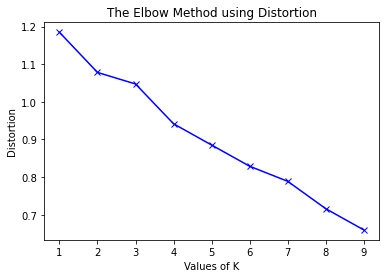

In [330]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [324]:
# set number of clusters
#Cluster Neighborhoods
#Run k-means to cluster the neighborhood into 3 clusters

kclusters = 3

lagos_grouped_clustering = lagos_malls_transposed.drop(['Venue Category'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lagos_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0])

In [325]:
lagos_malls_transposed.insert(0, 'Cluster Labels', kmeans.labels_)
lagos_malls_transposed.head(50)

Venue Category,Cluster Labels,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall
Alakuko/Kollington,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Alausa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Darocha,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Egbe/Agodo,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Eiyekole,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Epetedo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Ilasan Housing Estate,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ilupeju,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
Ilupeju Industrial Estate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Mafoluku,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [326]:
#cluster one

Cluster_One = lagos_malls_transposed.loc[lagos_malls_transposed['Cluster Labels'] == 0, lagos_malls_transposed.columns[[1] + list(range(5, lagos_malls_transposed.shape[1]))]]
print(Cluster_One.shape)
Cluster_One

(23, 1120)


Venue Category               Shopping Mall  Shopping Mall  Shopping Mall  \
 Alakuko/Kollington                      0              0              0   
 Alausa                                  0              0              0   
 Darocha                                 0              1              0   
 Egbe/Agodo                              0              0              1   
 Eiyekole                                0              0              0   
 Epetedo                                 0              0              0   
 Ilasan Housing Estate                   0              0              0   
 Ilupeju                                 0              0              0   
 Ilupeju Industrial Estate               0              0              0   
 Mafoluku                                0              0              0   
 Military Cantonment                     0              0              0   
 Obalende                                0              0              0   
 Onikan                                  0              0              0   
 Opebi                                   0              0              0   
 Orile-Oshodi                            0              0              0   
 Sandgrouse                              0              0              0   
 Yaba                                    0              0              0   
Amuwo-Odofin Housing Estate              0              0              0   
Isale/Idimangoro                         1              0              0   
Liverpool Rd                             0              0              0   
Pelewura Crescent                        0              0              0   
Shitta                                   0              0              0   
Victoria Island                          0              0              0   

Venue Category               Shopping Mall  Shopping Mall  Shopping Mall  \
 Alakuko/Kollington                      0              0              0   
 Alausa                                  0              0              0   
 Darocha                                 0              0              0   
 Egbe/Agodo                              0              0              0   
 Eiyekole                                0              0              0   
 Epetedo                                 0              0              0   
 Ilasan Housing Estate                   0              0              0   
 Ilupeju                                 0              0              0   
 Ilupeju Industrial Estate               0              0              0   
 Mafoluku                                0              0              0   
 Military Cantonment                     0              0              0   
 Obalende                                0              0              0   
 Onikan                                  0              0              0   
 Opebi                                   0              0              0   
 Orile-Oshodi                            0              0              0   
 Sandgrouse                              0              0              0   
 Yaba                                    0              0              0   
Amuwo-Odofin Housing Estate              1              0              0   
Isale/Idimangoro                         0              0              0   
Liverpool Rd                             0              1              1   
Pelewura Crescent                        0              0              0   
Shitta                                   0              0              0   
Victoria Island                          0              0              0   

Venue Category               Shopping Mall  Shopping Mall  Shopping Mall  \
 Alakuko/Kollington                      0              0              0   
 Alausa                                  0              0              0   
 Darocha                                 0              0              0   
 Egbe/Agodo                              0    

In [327]:
#cluster Two

Cluster_Two = lagos_malls_transposed.loc[lagos_malls_transposed['Cluster Labels'] == 1, lagos_malls_transposed.columns[[1] + list(range(5, lagos_malls_transposed.shape[1]))]]
print(Cluster_Two.shape)
Cluster_Two

(1, 1120)


Venue Category,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping 

In [328]:
#cluster Three

Cluster_Three = lagos_malls_transposed.loc[lagos_malls_transposed['Cluster Labels'] == 2, lagos_malls_transposed.columns[[1] + list(range(5, lagos_malls_transposed.shape[1]))]]
print(Cluster_Three.shape)
Cluster_Three

(1, 1120)


Venue Category,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping Mall,Shopping 

In [190]:
lagos_grouped = lagos_malls.groupby('Venue Category').sum().reset_index()
lagos_grouped

,Venue Category,Alakuko/Kollington,Alausa,Darocha,Egbe/Agodo,Eiyekole,Epetedo,Ilasan Housing Estate,Ilupeju,Ilupeju Industrial Estate,Mafoluku,Military Cantonment,Obalende,Onikan,Opebi,Orile-Oshodi,Sandgrouse,Yaba,Amuwo-Odofin Housing Estate,Anthony,Iponri Housing Estate,Isale/Idimangoro,Liverpool Rd,Pelewura Crescent,Shitta,Victoria Island
0,Shopping Mall,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,3,3,1,2,2,2,2


In [130]:
lagos_grouped.shape

(1, 26)

Let's view the shopping malls on a bar chart

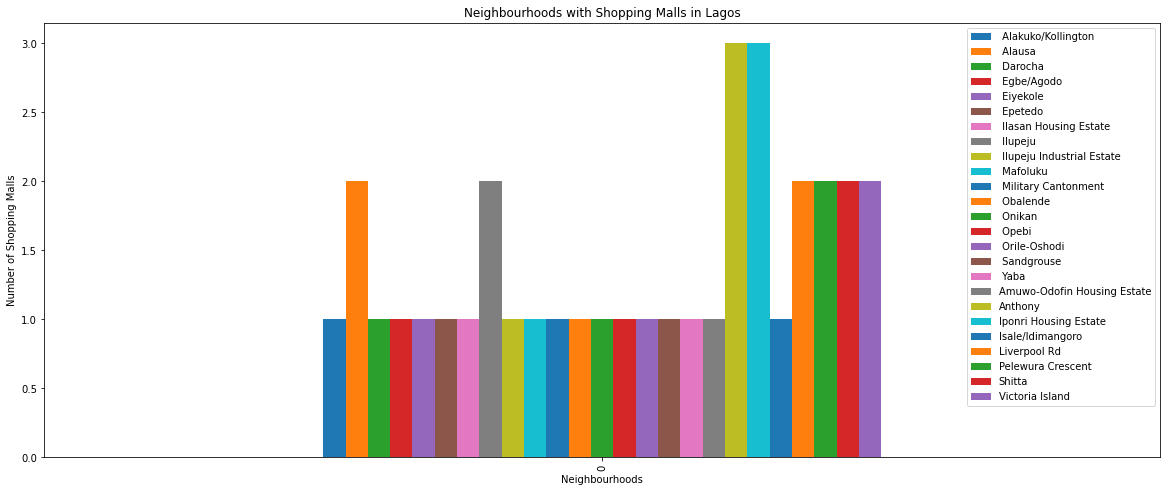

In [191]:
# step 2: plot data
lagos_grouped.plot(kind='bar', figsize=(20, 8))

plt.xlabel('Neighbourhoods') # add to x-label to the plot
plt.ylabel('Number of Shopping Malls') # add y-label to the plot
plt.title('Neighbourhoods with Shopping Malls in Lagos') # add title to the plot

plt.show()

We can see from the graph that Anthony and Iponri Housing Estate have the highest number of shopping Malls.

##### Now we will sort our data according to the highest number of shopping malls and put them into a dataframe

First, let's write a function to sort the venues in descending order.

In [132]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [133]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Venue Category']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} with high Number of Shopping Malls'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th with high Number of Shopping Malls'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Venue Category'] = lagos_grouped['Venue Category']

for ind in np.arange(lagos_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lagos_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Venue Category,1st with high Number of Shopping Malls,2nd with high Number of Shopping Malls,3rd with high Number of Shopping Malls,4th with high Number of Shopping Malls,5th with high Number of Shopping Malls,6th with high Number of Shopping Malls,7th with high Number of Shopping Malls,8th with high Number of Shopping Malls,9th with high Number of Shopping Malls,10th with high Number of Shopping Malls
0,Shopping Mall,Iponri Housing Estate,Anthony,Victoria Island,Pelewura Crescent,Liverpool Rd,Alausa,Shitta,Ilupeju,Mafoluku,Darocha


### 3.1.2 Explore & Cluster Top Lagos Venue Categories
We will explore and cluster top venue categories across Lagos neighbourhoods to enable us ascertain top areas in need of business activities and shopping malls.

In [154]:
# get top 10 most frequent venues
n = 10
Top_Venue = lagos_venues['Venue Category'].value_counts()[:n].index.tolist()
Top_Venue

['Fast Food Restaurant',
 'Hotel',
 'Bus Station',
 'Bank',
 'Bar',
 'Market',
 'Shopping Mall',
 'African Restaurant',
 'Convenience Store',
 'Department Store']

Let's check how many venues were returned for each neighborhood

In [331]:
lagos_venues_grouped = lagos_venues.groupby('Neighbourhood').count()
print (lagos_venues_grouped.shape)
lagos_venues_grouped.head()

(168, 6)


,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Abule-Egba,4,4,4,4,4,4
Abule-Okuta,3,3,3,3,3,3
Adekunle,10,10,10,10,10,10
Adeniyi Jones,5,5,5,5,5,5
Ado,6,6,6,6,6,6


In [204]:
lagos_venues_grouped_sorted = lagos_venues_grouped.sort_values('Neighbourhood Latitude', ascending=[False])
lagos_venues_grouped_sorted.head(10)

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Victoria Island,91,91,91,91,91,91
Opebi,33,33,33,33,33,33
Maryland,23,23,23,23,23,23
Military Cantonment,22,22,22,22,22,22
Sandgrouse,22,22,22,22,22,22
Alausa,21,21,21,21,21,21
Onikan,20,20,20,20,20,20
Iponri Housing Estate,18,18,18,18,18,18
Anthony,18,18,18,18,18,18


Let's find out how many unique categories can be curated from all the returned venues

In [332]:
print('There are {} uniques categories.'.format(len(lagos_venues['Venue Category'].unique())))

There are 158 uniques categories.


Print out the list of categories

In [157]:
lagos_venues['Venue Category'].unique()[:50]

array(['Shopping Mall', 'Bus Station', 'Bank', 'Fast Food Restaurant',
       'American Restaurant', 'Bar', 'Hotel', 'Business Service',
       'African Restaurant', 'Airport Terminal', 'Campground', 'Bus Stop',
       'Gym', 'Market', 'Mobile Phone Shop', 'Art Gallery',
       'Soccer Stadium', 'Clothing Store', 'Food Truck',
       'Harbor / Marina', 'Volleyball Court', 'Boat or Ferry',
       'Liquor Store', 'Athletics & Sports', 'Convenience Store',
       'Department Store', 'Pharmacy', 'Hotel Pool', 'Grocery Store',
       'Ski Lodge', 'BBQ Joint', 'Fried Chicken Joint', 'Movie Theater',
       'Basketball Court', 'Hotel Bar', 'IT Services', 'Flea Market',
       'Burger Joint', 'Hookah Bar', 'Pool', 'Chinese Restaurant',
       'Bakery', 'Food', 'Resort', 'Beach Bar', 'Music Venue',
       'Taxi Stand', 'Bookstore', 'Pub', 'Hot Dog Joint'], dtype=object)

### Analysis

Let's perform some basic explanatory data analysis and derive some additional info from our raw data. First, we will analyze each neighborhood

In [246]:
# one hot encoding
lagos_onehot = pd.get_dummies(lagos_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
lagos_onehot['Neighbourhood'] = lagos_venues['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [lagos_onehot.columns[-1]] + list(lagos_onehot.columns[:-1])
lagos_onehot = lagos_onehot[fixed_columns]

lagos_onehot.head()

,Neighbourhood,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Beach,Beach Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Campground,Candy Store,Cave,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Cricket Ground,Cupcake Shop,Department Store,Dessert Shop,Diner,Dog Run,Electronics Store,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fried Chicken Joint,German Restaurant,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Heliport,Historic Site,History Museum,Hookah Bar,Hospital,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Karaoke Bar,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Modern European Restaurant,Motel,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Optical Shop,Other Nightlife,Outlet Store,Park,Performing Arts Venue,Pharmacy,Photography Studio,Pier,Pizza Place,Playground,Plaza,Pool,Pub,Rental Car Location,Resort,Rest Area,Restaurant,Salad Place,Salon / Barbershop,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Ski Lodge,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Stadium,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Taxi Stand,Tennis Court,Theater,Tourist Information Center,Track,Trail,Train Station,Volleyball Court,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Isale/Idimangoro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Isale/Idimangoro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Isale/Idimangoro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Isale/Idimangoro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Oniwaya,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [249]:
a = lagos_onehot.drop(['Neighbourhood'], axis=1)
a.head()

,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Beach,Beach Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Campground,Candy Store,Cave,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Cricket Ground,Cupcake Shop,Department Store,Dessert Shop,Diner,Dog Run,Electronics Store,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fried Chicken Joint,German Restaurant,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Heliport,Historic Site,History Museum,Hookah Bar,Hospital,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Karaoke Bar,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Modern European Restaurant,Motel,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Optical Shop,Other Nightlife,Outlet Store,Park,Performing Arts Venue,Pharmacy,Photography Studio,Pier,Pizza Place,Playground,Plaza,Pool,Pub,Rental Car Location,Resort,Rest Area,Restaurant,Salad Place,Salon / Barbershop,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Ski Lodge,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Stadium,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Taxi Stand,Tennis Court,Theater,Tourist Information Center,Track,Trail,Train Station,Volleyball Court,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [84]:
lagos_onehot.shape

(1249, 159)

In [220]:
lagos_grouped = lagos_onehot.groupby('Neighbourhood').mean().reset_index()
lagos_grouped.head()

,Neighbourhood,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Beach,Beach Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Campground,Candy Store,Cave,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Cricket Ground,Cupcake Shop,Department Store,Dessert Shop,Diner,Dog Run,Electronics Store,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fried Chicken Joint,German Restaurant,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Heliport,Historic Site,History Museum,Hookah Bar,Hospital,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Karaoke Bar,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Modern European Restaurant,Motel,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Optical Shop,Other Nightlife,Outlet Store,Park,Performing Arts Venue,Pharmacy,Photography Studio,Pier,Pizza Place,Playground,Plaza,Pool,Pub,Rental Car Location,Resort,Rest Area,Restaurant,Salad Place,Salon / Barbershop,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Ski Lodge,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Stadium,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Taxi Stand,Tennis Court,Theater,Tourist Information Center,Track,Trail,Train Station,Volleyball Court,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Abule-Egba,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abule-Okuta,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Adekunle,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Let's confirm the new size

In [160]:
lagos_grouped.shape

(168, 159)

#### Let's print each neighborhood along with the top 5 most common venues

In [161]:
num_top_venues = 5

for hood in lagos_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = lagos_grouped[lagos_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Abule-Egba----
          venue  freq
0   Flea Market  0.25
1    Hookah Bar  0.25
2   Bus Station  0.25
3  Burger Joint  0.25
4          Park  0.00


---- Abule-Okuta----
                  venue  freq
0                   Bar  0.33
1  Fast Food Restaurant  0.33
2     Convenience Store  0.33
3          Outlet Store  0.00
4                Museum  0.00


---- Adekunle----
               venue  freq
0          Nightclub   0.2
1             Market   0.1
2              Hotel   0.1
3                Spa   0.1
4  Indian Restaurant   0.1


---- Adeniyi Jones----
                   venue  freq
0                  Hotel   0.4
1     Chinese Restaurant   0.2
2              BBQ Joint   0.2
3               Boutique   0.2
4  Performing Arts Venue   0.0


---- Ado----
                venue  freq
0  African Restaurant  0.17
1         Beer Garden  0.17
2          Restaurant  0.17
3      Cosmetics Shop  0.17
4             Dog Run  0.17


---- Aga----
                venue  freq
0               Hotel   0.

#### Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [162]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [334]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue Category'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = lagos_grouped['Neighbourhood']

for ind in np.arange(lagos_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lagos_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category,9th Most Common Venue Category,10th Most Common Venue Category
0,Abule-Egba,Hookah Bar,Flea Market,Bus Station,Burger Joint,Cosmetics Shop,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop
1,Abule-Okuta,Bar,Convenience Store,Fast Food Restaurant,Clothing Store,Cupcake Shop,Farmers Market,Electronics Store,Dog Run,Diner,Dessert Shop
2,Adekunle,Nightclub,Spa,Bar,Market,Hotel,Lounge,Burger Joint,Indian Restaurant,Department Store,Cupcake Shop
3,Adeniyi Jones,Hotel,Chinese Restaurant,Boutique,BBQ Joint,Electronics Store,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop
4,Ado,African Restaurant,Cosmetics Shop,Dog Run,Hotel,Beer Garden,Restaurant,Diner,Dessert Shop,Department Store,Cupcake Shop


In [253]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 

for k in K: 
	#Building and fitting the model 
	kmeanModel = KMeans(n_clusters=k).fit(a) 
	kmeanModel.fit(a)	 
	
	distortions.append(sum(np.min(cdist(a, kmeanModel.cluster_centers_, 
					'euclidean'),axis=1)) / a.shape[0]) 
	inertias.append(kmeanModel.inertia_) 

	mapping1[k] = sum(np.min(cdist(a, kmeanModel.cluster_centers_, 
				'euclidean'),axis=1)) / a.shape[0] 
	mapping2[k] = kmeanModel.inertia_ 


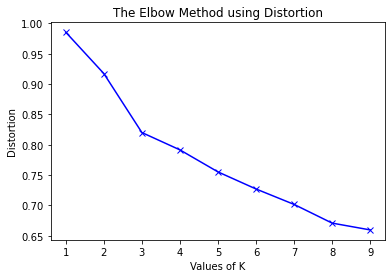

In [256]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


### Cluster Neighborhoods
Run k-means to cluster the neighborhood into clusters.

In [335]:
# set number of clusters
#Cluster Neighborhoods
#Run k-means to cluster the neighborhood into 3 clusters

kclusters = 3

lagos_grouped_clustering = lagos_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lagos_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [336]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

lagos_merged = lagos_data

# merge lagos_grouped with lagos_data to add latitude/longitude for each neighbourhood
lagos_merged = lagos_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

print(lagos_merged.shape)
lagos_merged.head() # check the last columns!

(196, 15)


,LGA,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category,9th Most Common Venue Category,10th Most Common Venue Category
0,Agege,Isale/Idimangoro,6.611174,3.322951,2.0,Bus Station,Shopping Mall,Bank,Convention Center,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop,Cricket Ground
1,Agege,Oniwaya,6.618026,3.320924,0.0,Bar,American Restaurant,Fast Food Restaurant,Cocktail Bar,Cupcake Shop,Farmers Market,Electronics Store,Dog Run,Diner,Dessert Shop
2,Agege,Agbotikuyo,6.618338,3.310019,0.0,African Restaurant,Airport Terminal,Bus Station,Business Service,Fast Food Restaurant,Hotel,Cocktail Bar,Cricket Ground,Electronics Store,Dog Run
3,Agege,Oyewole,6.620841,3.306352,0.0,Campground,Bus Stop,Bus Station,Gym,Cosmetics Shop,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop
4,Agege,Okekoto,6.627380,3.318414,0.0,Fast Food Restaurant,Market,Bus Station,Cosmetics Shop,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop,Cricket Ground


In [339]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lagos_merged['Latitude'], lagos_merged['Longitude'], lagos_merged['Neighbourhood'], lagos_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow,
        fill=True,
        fill_color=rainbow,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Examine Clusters**

In [341]:
#cluster one

Cluster_One = lagos_merged.loc[lagos_merged['Cluster Labels'] == 0, lagos_merged.columns[[1] + list(range(5, lagos_merged.shape[1]))]]
print(Cluster_One.shape)
Cluster_One

(150, 11)


,Neighbourhood,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category,9th Most Common Venue Category,10th Most Common Venue Category
1,Oniwaya,Bar,American Restaurant,Fast Food Restaurant,Cocktail Bar,Cupcake Shop,Farmers Market,Electronics Store,Dog Run,Diner,Dessert Shop
2,Agbotikuyo,African Restaurant,Airport Terminal,Bus Station,Business Service,Fast Food Restaurant,Hotel,Cocktail Bar,Cricket Ground,Electronics Store,Dog Run
3,Oyewole,Campground,Bus Stop,Bus Station,Gym,Cosmetics Shop,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop
4,Okekoto,Fast Food Restaurant,Market,Bus Station,Cosmetics Shop,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop,Cricket Ground
5,Darocha,Soccer Stadium,Art Gallery,Mobile Phone Shop,Shopping Mall,Yoga Studio,Cosmetics Shop,Dog Run,Diner,Dessert Shop,Department Store
6,Tabon,Fast Food Restaurant,Market,American Restaurant,Yoga Studio,Cricket Ground,Electronics Store,Dog Run,Diner,Dessert Shop,Department Store
7,Orile Agege,Campground,Business Service,Bus Station,Gym,Cosmetics Shop,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop
8,Isale Odo,Campground,Clothing Store,Business Service,Bus Station,Gym,Cosmetics Shop,Dog Run,Diner,Dessert Shop,Department Store
9,Ago Hausa,Food Truck,Yoga Studio,Fast Food Restaurant,Electronics Store,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop,Cricket Ground
11,Wilmer,Harbor / Marina,Mobile Phone Shop,Volleyball Court,Boat or Ferry,Cosmetics Shop,Electronics Store,Dog Run,Diner,Dessert Shop,Department Store


In [342]:
#cluster two

Cluster_Two = lagos_merged.loc[lagos_merged['Cluster Labels'] == 1, lagos_merged.columns[[1] + list(range(5, lagos_merged.shape[1]))]]
print(Cluster_Two.shape)
Cluster_Two

(13, 11)


,Neighbourhood,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category,9th Most Common Venue Category,10th Most Common Venue Category
31,Kirikiri,Hotel,Yoga Studio,Cosmetics Shop,Electronics Store,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop,Cricket Ground
33,Ijegun,Hotel,Yoga Studio,Cosmetics Shop,Electronics Store,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop,Cricket Ground
51,Oke-Balogun,Bank,Hotel,Yoga Studio,Cosmetics Shop,Electronics Store,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop
87,Adeniyi Jones,Hotel,Chinese Restaurant,Boutique,BBQ Joint,Electronics Store,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop
91,GRA,Hotel,African Restaurant,Nightclub,Ice Cream Shop,Golf Course,Convention Center,Diner,Dessert Shop,Department Store,Cupcake Shop
94,Aga,Hotel,Athletics & Sports,Yoga Studio,Cosmetics Shop,Electronics Store,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop
104,Igbaga,Hotel,Yoga Studio,Cosmetics Shop,Electronics Store,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop,Cricket Ground
108,Ajao Estate,Hotel,Motel,Airport,Pizza Place,Fast Food Restaurant,Diner,Flea Market,BBQ Joint,Cricket Ground,Dog Run
159,Ajangbadi,Hotel,Food,Yoga Studio,Cosmetics Shop,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop,Cricket Ground
161,Etegbin,Hotel,Yoga Studio,Cosmetics Shop,Electronics Store,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop,Cricket Ground


In [186]:
#cluster three

Cluster_Three = lagos_merged.loc[lagos_merged['Cluster Labels'] == 2, lagos_merged.columns[[1] + list(range(5, lagos_merged.shape[1]))]]
print(Cluster_Three.shape)
Cluster_Three

(8, 11)


,Neighbourhood,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category,8th Most Common Venue Category,9th Most Common Venue Category,10th Most Common Venue Category
0,Isale/Idimangoro,Bus Station,Shopping Mall,Bank,Convention Center,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop,Cricket Ground
15,Alaba Oro,Bus Station,Yoga Studio,Cosmetics Shop,Electronics Store,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop,Cricket Ground
17,Shasha,Bus Station,Bar,Athletics & Sports,Cricket Ground,Farmers Market,Electronics Store,Dog Run,Diner,Dessert Shop,Department Store
22,Egbe/Agodo,Bus Station,Fried Chicken Joint,Shopping Mall,Movie Theater,Diner,Dessert Shop,Department Store,Cupcake Shop,Cricket Ground,Cosmetics Shop
78,Ijaiye/Ojokoro,Farmers Market,Skate Park,Bus Station,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop,Cricket Ground,Cosmetics Shop
164,Oshodi,Fast Food Restaurant,Bus Station,Cosmetics Shop,Electronics Store,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop,Cricket Ground
169,Sogunle,Bus Station,Hotel,Nightclub,Hotel Pool,Golf Course,Indian Restaurant,Yoga Studio,Cosmetics Shop,Diner,Dessert Shop
192,Coker,Bus Station,Fast Food Restaurant,Cosmetics Shop,Electronics Store,Dog Run,Diner,Dessert Shop,Department Store,Cupcake Shop,Cricket Ground


# 4.0 Results and Discussion <a name="result"></a>

Our analysis showed that although there is a great number of venues in Lagos (1500m radius around each neighbourhood), there are pockets of low density shopping malls across the state. As seen from our analysis, first our data returned 35 shopping malls within only 25 neighbourhoods.

Most of the shopping malls are concentrated around Iponri Housing Estate, Anthony, Victoria Island, Shitta, Pelewura Crescent, Liverpool Rd, Ilupeju, and Alusa. Other areas have negligible presence of shopping malls in the neighborhoods. It opens the door of opportunities for new shopping malls as these areas have very little to no competition from existing malls.

Moreso, in exploring top locations with business activities, Foursquare API returned 1249 venues across all neighbourhoods. The top four occurring venue categories across all neighbourhood are Fast Food Restaurant, Hotel, Bus Station, Banks, and Bars. Clearly showing that these services are in high demand in Lagos, consequently topping the list in occurrence.

Using the k-means unsupervised learning, I also clustered these locations into three different clusters which showed; Cluster One: "Food & Commerce", Cluster Two: "Hotels & Dinner", Cluster Three: "Bus stations & Department Stores".

Furthermore, although we have 1249 venues, there are, however, only 158 unique venue category. While this is quite broad, the number of occurrence however shows a huge gap between the top occurring venues from the rest of the venue category. For instance, while most locations have Fast Food Restaurant, the majority hardly have pharmacies, IT services, Grocery stores, Bookstores, etc. 

Therefore, this project recommends that firms should explore other services across each neighborhood to meet the demand in those areas. Companies can also leverage on the clustered data to improve the business services around the top venues.

Finally, real estate developers can capitalize on these findings to open new shopping malls in neighborhoods without one. Realty developers with unique selling propositions to stand out from the competition can also open new shopping malls in neighborhoods with existing shopping malls.

In future studies, the population and age across each neighbourhood could be added to help investors make better decisions.

## 5.0 Conclusion <a name="conclusion"></a>
In this project, we have gone through the process of identifying the business problem, data extraction, and preparation, performing machine learning by clustering the data into 3 clusters based on their similarities, and lastly providing recommendations to the relevant stakeholders.

The findings of this project will help the relevant stakeholders to capitalize on the opportunities on high potential locations while avoiding overcrowded areas in their decisions to create improved products & services.

References

[1] [Lagos - Wikipedia](https://en.wikipedia.org/wiki/Lagos_State)

[2] [Forsquare API](https://developer.foursquare.com/developer/)

[3] [Google Map](https://www.google.com/maps/)

[4] [Python Package Index](https://pypi.org/)

[5] [Reasons to Invest in Lagos](https://lagosglobal.org/reasons-to-invest-in-lagos/)

[6] [The Report: Nigeria 2016](https://oxfordbusinessgroup.com/nigeria-2016/industry-retail#:~:text=The%20retail%20sector%20is%20based,goods%20and%20managing%20currency%20risk)